                                        ##############################
                                        #   **Cities Fingerprint**   #
                                        #     Shortest Path Data     #                                                  
                                        #                            #
                                        #   		  codename: k1   #
                                        #                            #
                                        #   version = 201604251112   #
                                        #    Issues known: none      #
                                        #                            #
                                        #   A script by AndresPDLR   #
                                        ##############################


    This program performs statistical analysis over city simulation made
    by Module_SHORTEST_PATHS

<div class="alert alert-success">
**Requirements**

</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import statsmodels.api as sm
import math as mt
import datetime
import ast
from sys import argv
import csv
import os
from simpledbf import Dbf5
import scipy

from localidades_100k import localidades_100k_dictionary
from localidades import localidades_dictionary

In [15]:
poblacion_localidades_100k = sum(localidades_100k_dictionary.values())
poblacion_urbana = sum(localidades_dictionary.values())

print(poblacion_localidades_100k / poblacion_urbana)

0.6169473816526283


<div class="alert alert-success">
**Functions**
</div>

In [2]:
def de_string_list(list_as_string):
    ''' Transform string representation of list to list '''
    if type(list_as_string) != list:
        try:
            list_as_list = ast.literal_eval(list_as_string)
            return list_as_list
        except ValueError:
            return list_as_string
    else:
        return list_as_string

In [3]:
def beta_city(localidad):
    '''
    >> Performs distance analysis over a city landscape
    
    Input:
        - localidad
    
    Output:
        - 
    '''
    try:
        df_simulation = pd.read_csv('{}_simulation_results.csv'.format(localidad), header=None, names=['G_FID', 'Distances'])
        df_simulation = df_simulation.dropna()
        df_simulation['G_FID'] = df_simulation['G_FID'].apply(de_string_list)
        df_simulation['Distances'] = df_simulation['Distances'].apply(de_string_list)
        g_fids = []
        for x in df_simulation['G_FID']:
            if x[0] not in g_fids:
                g_fids.append(x[0])
            if x[1] not in g_fids:
                g_fids.append(x[1])
        averages = {}
        for g_fid in g_fids:
            rv = []
            for row in df_simulation['G_FID']:
                if g_fid in row:
                    temporary_df = df_simulation.loc[df_simulation['G_FID'] == row]
                    d_distance = temporary_df['Distances'].tolist()[0][1]
                    rv.append(d_distance)
            averages[g_fid] = sum(rv) / len(rv)
        writer = csv.writer(open('C:/Users/Andres/{}_average_distance.csv'.format(localidad), 'wt'))
        for key, value in averages.items():
            writer.writerow([str(key), value])
        X = []
        Y = []
        for row in df_simulation['Distances']:
            x = row[0]
            y = row[1]
            X.append(x)
            Y.append(y)
        OLS_results = sm.OLS(Y,X).fit()
        beta = OLS_results.params.tolist()[0]
        R2 = OLS_results.rsquared
        return [beta, R2]
    except ValueError:
        pass

In [5]:
beta_dictionary = {}

for localidad in localidades_100k_dictionary.keys():
    try:
        beta = beta_city(localidad)[0]
        beta_dictionary[localidad] = beta
    except TypeError:
        pass

In [17]:
localidades = []
betas = []
for k, v in beta_dictionary.items():
    localidades.append(k)
    betas.append(v)

beta_pd = pd.DataFrame({'Localidades': localidades, 'Beta': betas})
beta_pd.head()

,Beta,Localidades
0,1.421372,190210001
1,1.233281,100070001
2,1.198417,100050001
3,1.220898,151040001
4,1.312615,220160001


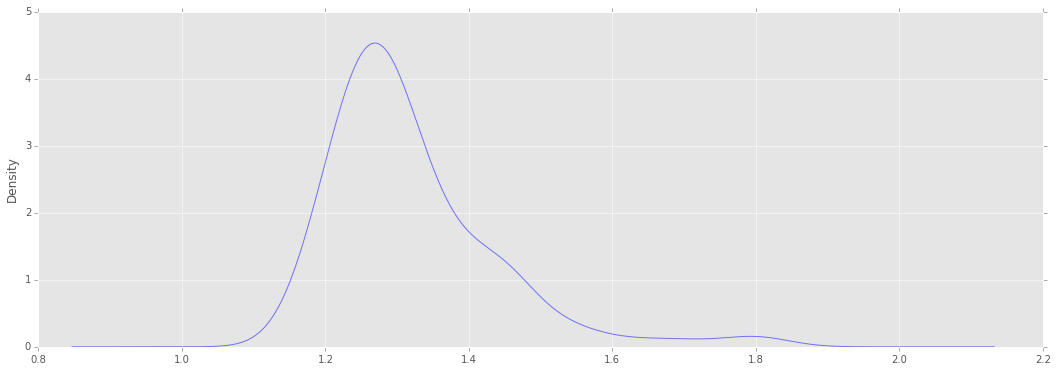

In [18]:
beta_pd['Beta'].plot(kind = 'kde', figsize=(18,6), color = 'blue', alpha = .5)

In [25]:
writer = csv.writer(open('C:/Users/Andres/betas.csv', 'wt'))
for k, v in beta_dictionary.items():
    writer.writerow([str(k), v])